![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 4 - Performance Evaluation </center>
### <center> Precision, Recall, ROC, and AUC</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/04_PerformanceEvaluation/MainPrecisionRecall1.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size':16})
# np.random.seed(1)

### Generate data:

In [7]:
from sklearn.datasets import make_moons

N1        = 950
N2        = 50
mX, vY    = make_moons(n_samples=[N1, N2], noise=.1)
vY[vY==0] = -1
mX.shape, vY.shape

((1000, 2), (1000,))

### Plot data:

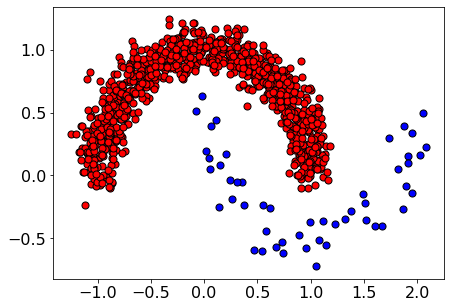

In [8]:
vIdx0 = vY == -1
plt.figure(figsize=(7, 5))
plt.scatter(mX[vIdx0,0],  mX[vIdx0,1],  s=50, c='r', edgecolor='k')
plt.scatter(mX[~vIdx0,0], mX[~vIdx0,1], s=50, c='b', edgecolor='k')

plt.show()

In [9]:
from sklearn.svm import SVC

oSVM  = SVC(kernel='linear').fit(mX, vY)
vHatY = oSVM.predict(mX)

### Plot decision boundary:

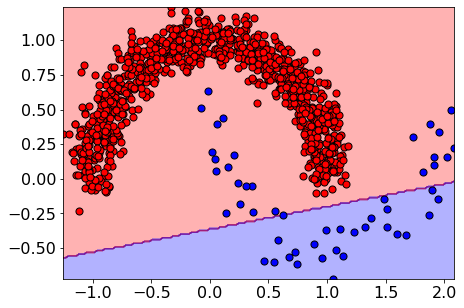

In [10]:
#-- make grid for plot:
v0       = np.linspace(mX[:,0].min(), mX[:,0].max(), 150)
v1       = np.linspace(mX[:,1].min(), mX[:,1].max(), 150)
XX0, XX1 = np.meshgrid(v0, v1)
XX       = np.c_[XX0.ravel(), XX1.ravel()]

Z = oSVM.predict(XX)
Z = Z.reshape(XX0.shape)

plt.figure(figsize=(7, 5))
plt.contourf(XX0, XX1, Z, colors=['red', 'blue'], alpha=0.3)
plt.scatter(mX[vIdx0,0],  mX[vIdx0,1],  s=50, c='r', edgecolor='k')
plt.scatter(mX[~vIdx0,0], mX[~vIdx0,1], s=50, c='b', edgecolor='k')
plt.show()

In [11]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(vY, vHatY, pos_label=1, average='binary')

print(f'Precision = {precision}')
print(f'Recall    = {recall}')
print(f'f1        = {f1}')

Precision = 1.0
Recall    = 0.48
f1        = 0.6486486486486487


In [12]:
from sklearn.metrics import roc_curve, auc

vScore      = oSVM.decision_function(mX)
vFP, vTP, _ = roc_curve(vY, vScore, pos_label=1)
AUC         = auc(vFP, vTP)

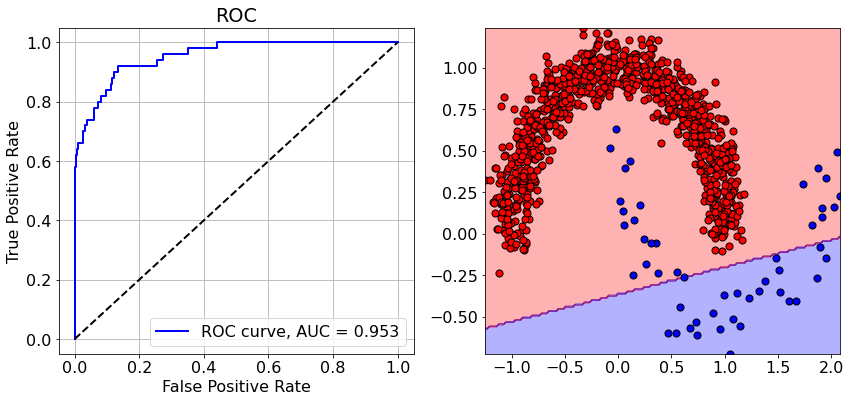

In [13]:
plt.figure(figsize=(14, 6))

plt.subplot(1,2,1); plt.grid(True)
plt.plot(vFP,    vTP,    color='b', lw=2, label=f'ROC curve, AUC = {AUC:.3f}')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()

plt.subplot(1,2,2);
plt.contourf(XX0, XX1, Z, colors=['red', 'blue'], alpha=0.3)
plt.scatter(mX[vIdx0,0],  mX[vIdx0,1],  s=50, c='r', edgecolor='k')
plt.scatter(mX[~vIdx0,0], mX[~vIdx0,1], s=50, c='b', edgecolor='k')
plt.show()

plt.show()

### Exercise
* Use the breast cancer dataset: `load_breast_cancer`.
* Use a linear SVM classifier.
* Use cross-validation to find a good value of $C$ which maximizes the AUC. 
    * use the following signature:  
        `cross_val_score(SVC(C=C, kernel='linear'), mX, vY, cv=KFold(20, shuffle=True), scoring=AucScore)`  
* Implement AucScore(oSVM, mX, vY). The output should be the AUC

In [16]:
from sklearn.datasets import load_breast_cancer

dData = load_breast_cancer()
mX    = dData.data
vY    = dData.target

#-- Normalize data:
mX    = mX - np.mean(mX, axis=0)
mX    = mX / np.std (mX, axis=0)

vY[vY == 0] = -1

In [17]:
import pandas as pd
from   sklearn.model_selection import cross_val_score, KFold

def AucScore(oSVM, mX, vY):
    ???
    return AUC

dRes = pd.DataFrame(columns=['C', 'AUC'])

for C in ???:
    vAUC                = cross_val_score(SVC(C=C, kernel='linear'), mX, vY, cv=KFold(20, shuffle=True), scoring=AucScore)
    dRes.loc[len(dRes)] = [C, np.mean(vAUC)]

dRes.sort_values(by='AUC', ascending=False)

SyntaxError: invalid syntax (<ipython-input-17-e10b6fac4b43>, line 10)